In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.set_index("Id", inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

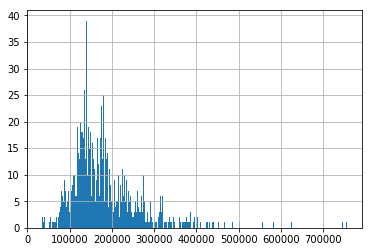

In [13]:
data['SalePrice'].hist(bins=500)

In [37]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
data_numeric = data.select_dtypes(exclude=['object'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [46]:
#calcul des coefficients de correlations entre les variables numériques
table_correlation = data_numeric.corr()


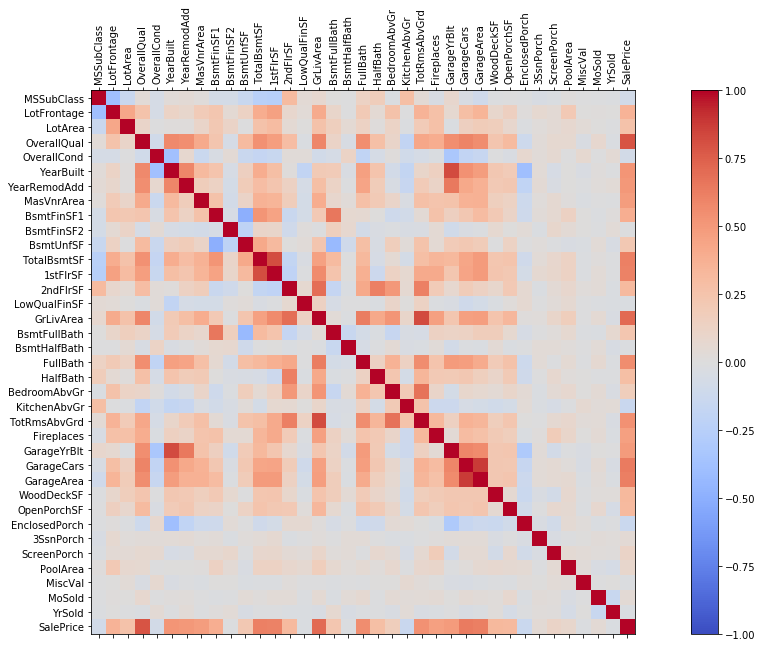

In [24]:
#Représentation graphique des correlations entre les variables numériques

corr = data_numeric.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_numeric.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_numeric.columns)
ax.set_yticklabels(data_numeric.columns)
plt.show()

In [47]:
#Récupération des variables fortement correlée avec le prix de vente
table_correlation[(table_correlation['SalePrice']>0.5) | (table_correlation['SalePrice']<(-0.5))]['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

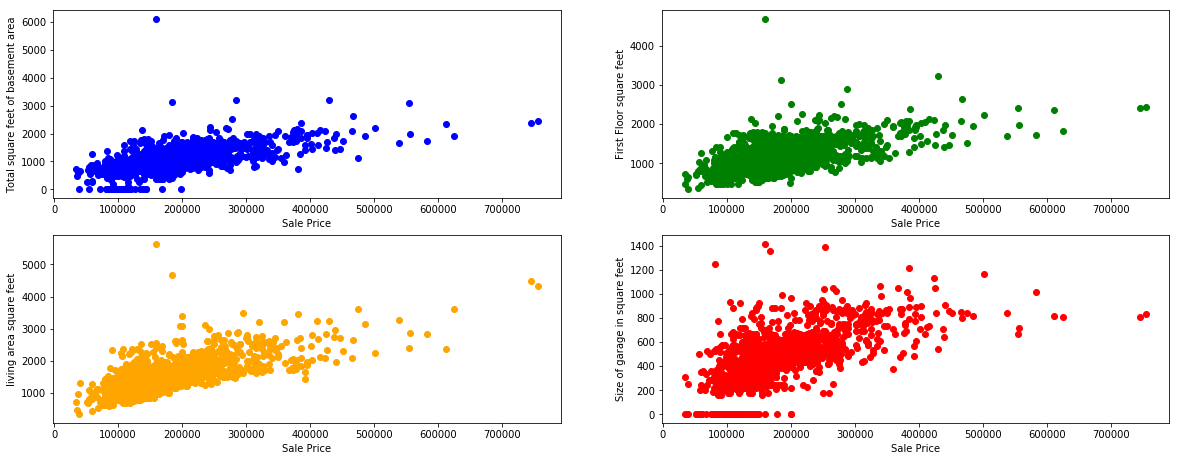

In [66]:
#Représentation graphiques en scatter plot des relations entres Sale Price et les variables d'intérets

x = data_numeric['SalePrice']

plt.figure(1, figsize=(20,20))


plt.subplot(5, 2, 1)
plt.scatter(x,y=data_numeric['TotalBsmtSF'], color = 'blue')
plt.xlabel("Sale Price")
plt.ylabel("Total square feet of basement area")

plt.subplot(5, 2, 2)
plt.scatter(x,y=data_numeric['1stFlrSF'], color = 'green')
plt.xlabel("Sale Price")
plt.ylabel("First Floor square feet")

plt.subplot(5, 2, 3)
plt.scatter(x,y=data_numeric['GrLivArea'], color = 'orange')
plt.xlabel("Sale Price")
plt.ylabel("living area square feet")

plt.subplot(5, 2, 4)
plt.scatter(x,y=data_numeric['GarageArea'], color = 'red')
plt.xlabel("Sale Price")
plt.ylabel("Size of garage in square feet")


'''plt.subplot(5, 2, 4)
plt.scatter(x,y=data_numeric['FullBath'], color = 'green')
plt.xlabel("Sale Price")
plt.ylabel("Full bathrooms")'''

'''plt.subplot(5, 2, 5)
plt.scatter(x,y=data_numeric['TotRmsAbvGrd'], color = 'green')
plt.xlabel("Sale Price")
plt.ylabel("Total rooms above grade")

plt.subplot(5, 2, 6)
plt.scatter(x,y=data_numeric['GarageCars'], color = 'green')
plt.xlabel("Sale Price")
plt.ylabel("Size of garage in car capacity")'''



plt.show()



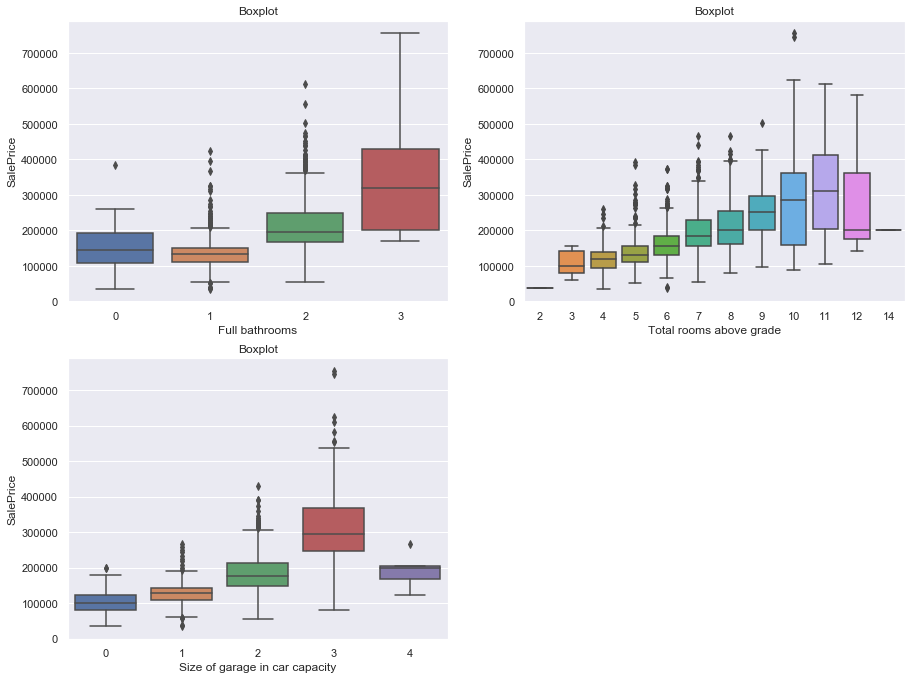

In [93]:
#Représentation graphiques en box plot des relations entres Sale Price et les variables d'intérets

plt.figure(1, figsize=(15,30))
plt.subplot(5, 2, 1)
ax = sns.boxplot(x="FullBath", y="SalePrice", data=data_numeric)
ax.set_xlabel("Full bathrooms")
ax.set_title("Boxplot")

plt.subplot(5, 2, 2)
ax = sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=data_numeric)
ax.set_xlabel("Total rooms above grade")
ax.set_title("Boxplot")

plt.subplot(5, 2, 3)
ax = sns.boxplot(x="GarageCars", y="SalePrice", data=data_numeric)
ax.set_xlabel("Size of garage in car capacity")
ax.set_title("Boxplot")

plt.show()
